In [ ]:
# here only executting stuff. no functions or classes

In [ ]:
## um die models und functions hier nutzen zu können, muss man die datein als module importieren. 
## das geht auch wenn das notebeooks sind, ist aber deutlich einfacher, wenn es einfach .py dateien sind.

In [ ]:
!pip install -r requirements.txt

## H2Z


In [ ]:
#!/usr/bin/env python3
#-*- coding:utf-8 -*-
#$ -l cuda=1 # remove this line when no GPU is needed!
#$ -q all.q # do not fill the qlogin queue
#$ -cwd # start processes in current working directory
#$ -V # provide environment variables to processes
#$ -t 1-8 # start 8 instances: to train different models in parallel
#Cluster settings, 
try:
    model_param_id = int(os.environ['SGE_TASK_ID'])
except:
    print("no SGE_TASK_ID set, choosing default model parameters ")
    model_param_id = 0 #param_train_cycle_list[0] should be default model params

import importlib
import models
import functions 
import torch
import torch.nn as nn
importlib.reload(models)
importlib.reload(functions)

# init CycleGAN
genA2B = models.Generator(input_nc=3, output_nc=3, n_residual_blocks=9)
genB2A = models.Generator(input_nc=3, output_nc=3, n_residual_blocks=9)
discA  = models.Discriminator(input_nc=3)
discB  = models.Discriminator(input_nc=3)
classifier = models.Classifier().net
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
root_path_data = "./data/horse2zebra"
root_path_checkpoints = "./checkpoints/horse2zebra"

cycle  = models.CycleGAN(genA2B, genB2A, discA, discB, classifier, device, root_path_data, root_path_checkpoints)

param_train_cycle  = models.Param(channels = 3, epochs = 2, size= 256,  name ="cycle_test")


param_train1  = models.Param(channels = 3, epochs = 2, size= 256,  name ="cycle_r9_advMSE_l10", resnet_blocks=9, loss_adv=torch.nn.MSELoss(), lambdas=(10,0.5)) # default
param_train2  = models.Param(channels = 3, epochs = 2, size= 256,  name ="cycle_r9_advMSE_l5" , resnet_blocks=9, loss_adv=torch.nn.MSELoss(), lambdas=(5,0.5))
param_train3  = models.Param(channels = 3, epochs = 2, size= 256,  name ="cycle_r9_advL1_l10", resnet_blocks=9, loss_adv=torch.nn.L1Loss(), lambdas=(10,0.5))
param_train4  = models.Param(channels = 3, epochs = 2, size= 256,  name ="cycle_r9_advL1_l5" , resnet_blocks=9, loss_adv=torch.nn.L1Loss(), lambdas=(5,0.5))
param_train5  = models.Param(channels = 3, epochs = 2, size= 256,  name ="cycle_r5_advMSE_l10", resnet_blocks=5, loss_adv=torch.nn.MSELoss(), lambdas=(10,0.5))
param_train6  = models.Param(channels = 3, epochs = 2, size= 256,  name ="cycle_r5_advMSE_l5" , resnet_blocks=5, loss_adv=torch.nn.MSELoss(), lambdas=(5,0.5))
param_train7  = models.Param(channels = 3, epochs = 2, size= 256,  name ="cycle_r5_advL1_l10", resnet_blocks=5, loss_adv=torch.nn.L1Loss(), lambdas=(10,0.5))
param_train8  = models.Param(channels = 3, epochs = 2, size= 256,  name ="cycle_r5_advL1_l5" , resnet_blocks=5, loss_adv=torch.nn.L1Loss(), lambdas=(5,0.5))
param_train_cycle_list = [param_train1, param_train2, param_train3, param_train4, param_train5, param_train6, param_train7, param_train8]

param_eval_testset = models.Param(channels = 3, size= 256) 
param_train_classifier = models.Param(channels = 3, epochs = 2, size = 256, name = "classifier_test")

model loaded:./checkpoints/horse2zebra/classifier_h2z_resnet18_v2 epoch100
model loaded:./checkpoints/horse2zebra/netG_A2B epoch100
model loaded:./checkpoints/horse2zebra/netG_B2A epoch100
model loaded:./checkpoints/horse2zebra/netD_A epoch100
model loaded:./checkpoints/horse2zebra/netD_B epoch100
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range fo

'noch nicht implementiert / aus altem code ubernommen:'

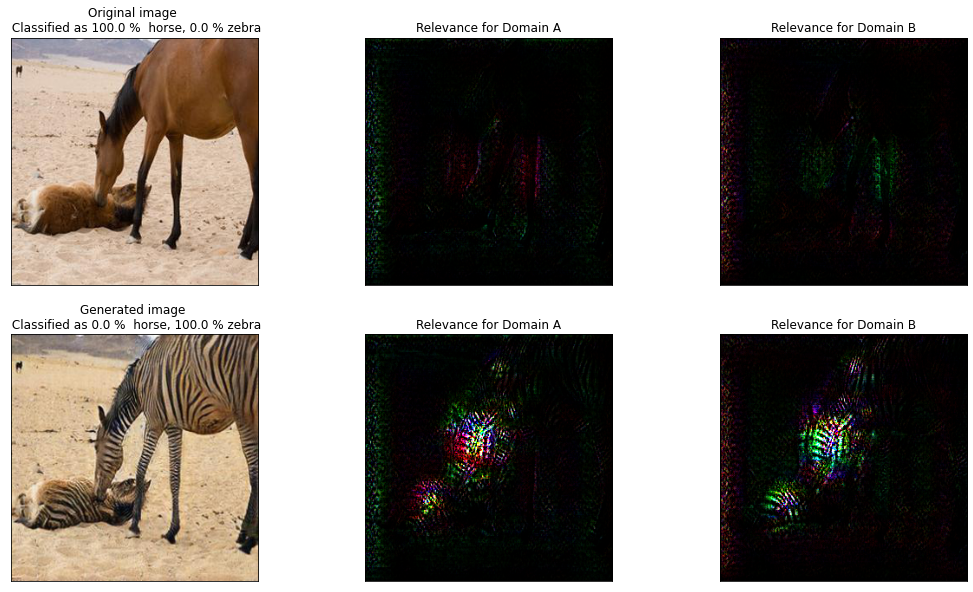

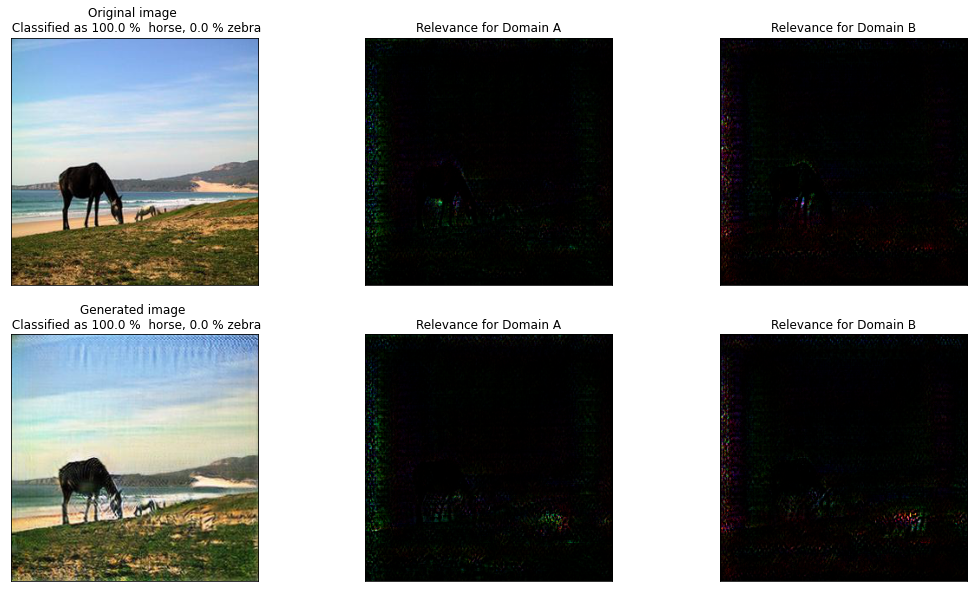

In [ ]:
### test functions
''' scheint zu funktionieren, aber nicht sonderlich fuer deepnote geeigent'''
#load the model_param_id parameters (used for parallel training on cluster)
param_train_cycle = param_train_cycle_list[model_param_id-1]
cycle.train(param_train_cycle)   
sys.exit("Training done")     
'''funktionieren:'''
cycle.load_classifier()
cycle.load_cycle_nets(epoch = 100)

'''damit eval_testset sinnvoll funktioniert, muss man vorher einmal load_classifier und load_cycle_nets ausführen'''
# eval_testset calculates the classifiers prediction for several pairs of original and generted images
# it returns the examined pictures in batch-form and two lists storing the classifiers prediction for the batches respectively
# if plot = True all chosen pairs as plottet with their classification scores
org, gen, org_percentage, gen_percentage = cycle.eval_testset(param_eval_testset, source_domain= "A",pic_number_low =0 , pic_number_high = 1, plot = True, explain = False) 
print(org_percentage)
print(gen_percentage)

''' scheint zu funktionieren, fuer h2z ist bereits ein classifier trainiert, fuer andere datensaetze noch nicht, nicht sonderlich fuer deepnote geeignet'''
#cycle.train_classifier(param_train_classifier) 

'''noch nicht implementiert / aus altem code ubernommen:'''
# contiue_train



## MNIST TEST

In [ ]:
import models
import functions
## das hier nur test. spaeter wieder loeschen
genA2B = models.Small_Generator(input_nc=1, output_nc=1, n_residual_blocks=3)
genB2A = models.Small_Generator(input_nc=1, output_nc=1, n_residual_blocks=3)
discA  = models.Small_Discriminator(input_nc=1)
discB  = models.Small_Discriminator(input_nc=1)

# collect data
functions.get_data_MNIST('fog',1000,100)
pathA_Train = 'data/mnist2fog_1000/trainA/'
pathB_Train = 'data/mnist2fog_1000/trainB/'
pathA_Test = 'data/mnist2fog_1000/testA/'
pathB_Test = 'data/mnist2fog_1000/testB/'
# train
cycle = models.CycleGAN(genA2B, genB2A, discA, discB, "dummy", "cpu")
params = models.Param(
    channels=1,
    epochs=20,
    size=28,
    pathA_Train=pathA_Train,
    pathB_Train=pathB_Train,
    pathA_Test=pathA_Test,
    pathB_Test=pathB_Test  
)

cycle.train(params)

TypeError: __init__() missing 2 required positional arguments: 'root_path_data' and 'root_path_checkpoints'